##  Sigma Filter

In [1]:
//load ImageJ
%classpath config resolver scijava.public https://maven.scijava.org/content/groups/public
%classpath add mvn net.imagej imagej 2.0.0-rc-67

//create ImageJ object
ij = new net.imagej.ImageJ()

Added new repo: scijava.public


net.imagej.ImageJ@3baf5137

This `Op` is an implementation of [this old ImageJ1 plugin](https://imagej.nih.gov/ij/plugins/sigma-filter.html). It is essentially a smoothing filter, similar to a [Gaussian](gauss.ipynb), however it provides parameters used to help preserve image edges, similar to that of a [bilateral filter](bilateral.ipynb). Let's see how the `Op` is called:

In [2]:
ij.op().help("sigma")

Available operations:
	(IterableInterval out) =
	net.imagej.ops.filter.sigma.DefaultSigmaFilter(
		IterableInterval out,
		RandomAccessibleInterval in,
		Shape shape,
		OutOfBoundsFactory outOfBoundsFactory?,
		Double range,
		Double minPixelFraction)

Let's take a look at the parameters here:

* `IterableInterval out`: the output image
* `RandomAccessibleInterval in`:  the input data
* `Shape shape`: the [`Shape`](http://javadoc.scijava.org/ImgLib2/net/imglib2/algorithm/neighborhood/Shape.html) that the `Op` will use at each pixel to create a [`Neighborhood`](http://javadoc.scijava.org/ImgLib2/net/imglib2/algorithm/neighborhood/package-summary.html) over which it will perform the algorihm.
* `Double range`: this double tells the `Op` the **maximum number of standard deviations allowed** for a pixel within the neighborhood to to be away from the center pixel and **still influence the output**. Values outside of this standard deviation (i.e. values on the other side of an edge) should be outside of this standard deviation, thereby not influencing the blurring and keeping the edges clean. Typically values between `1` and `2` are recommended for this parameter, with higher parameters smoothing the image (especially the edges) more.
* `Double minPixelFraction`: if the fraction of pixels within the range to pixels within the entire neighborhood is above this value, the `Op` will only calculate the average for all pixels within the range. If, however, this fraction is below `minPixelFraction`, the `Op` will calculate the average over the whole `Neighborhood`, disregarding the range. Typically values around `0.2` provide good results, with higher values suppressing more noise at the cost of smoother edges.

This is a lot to think about, so let's show an example:

[INFO] Populating metadata
[INFO] Populating metadata


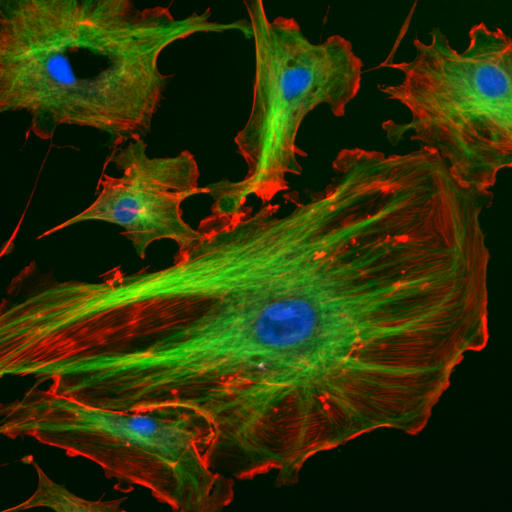

In [3]:
input = ij.scifio().datasetIO().open("http://imagej.net/images/FluorescentCells.jpg")

ij.notebook().display(input)

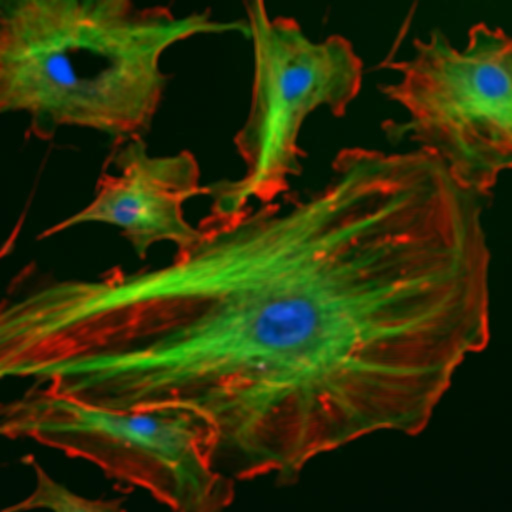

In [4]:
import net.imglib2.algorithm.neighborhood.RectangleShape
import net.imagej.ops.Ops
import net.imagej.ops.special.computer.Computers

//create the shape that we will use
shape = new RectangleShape(2, false)

//create the Op instance that we will pass through to slice
output = ij.op().run("create.img", input)
range = 1.0 as double
minPixelFraction = 0.1 as double
sigmaOp = Computers.unary(ij.op(), Ops.Filter.Sigma.class, output, input, shape, range, minPixelFraction)   

//call slice using our sigma Op - axis Indices should be [0, 1] because we want our slices to be each channel
axisIndices = [0, 1] as int[]
ij.op().run("slice", output, input, sigmaOp, axisIndices)

ij.notebook().display(output)